<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/cisirtraining/summerschool/Day1/Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wavelet Transform

## Intorduction

1. Wavelets are mathematical functions that cut up data into difierent frequency components, and then study each component with a resolution matched to its scale. They have advantages over traditional Fourier methods in analyzing physical situations where the signal contains discontinuities and sharp spikes. 

2. PyWavelets is open source wavelet transform software for Python. It combines a simple high level interface with low level C and Cython performance.

3. The main features of PyWavelets are:

 
*   1D, 2D and nD Forward and Inverse Discrete Wavelet Transform (DWT and IDWT)
*   1D, 2D and nD Multilevel DWT and IDWT

* 1D, 2D and nD Stationary Wavelet Transform (Undecimated Wavelet Transform)
* 1D and 2D Wavelet Packet decomposition and reconstruction
* 1D Continuous Wavelet Transform
* Computing Approximations of wavelet and scaling functions
* Over 100 built-in wavelet filters and support for custom wavelets
* Single and double precision calculations
* Real and complex calculations
* Results compatible with Matlab Wavelet Toolbox (TM)




The PyWavelets library for example contains 14 mother Wavelets (families of Wavelets):

In [0]:
import pywt
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


Below we can see a plot with several different families of wavelets.
The first row contains four Discrete Wavelets and the second row four Continuous Wavelets.

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


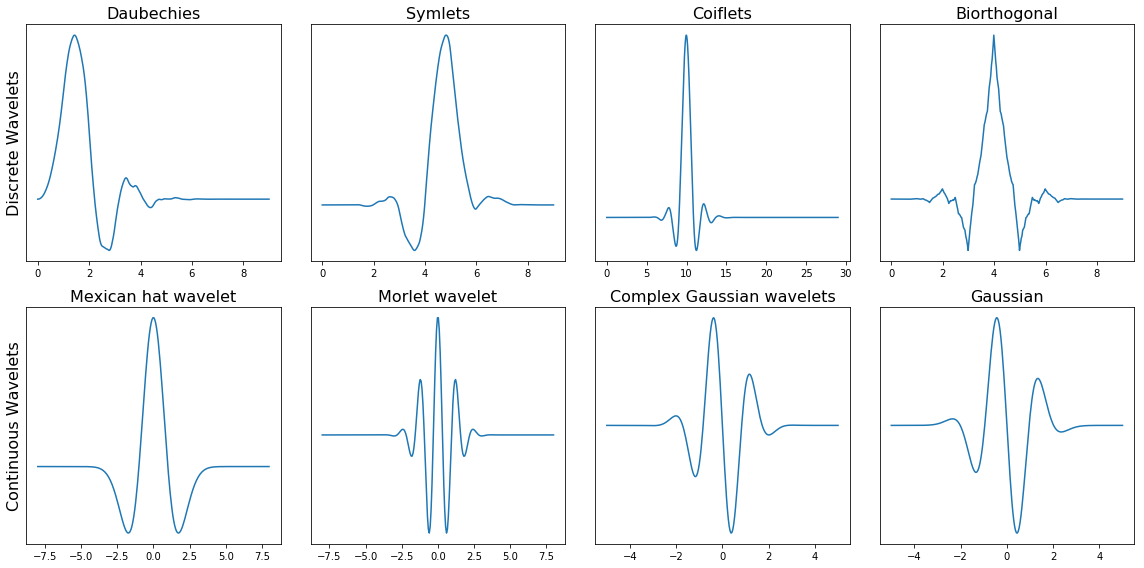

In [0]:
import matplotlib.pyplot as plt
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

To see how all wavelets looks like, you can have a look at the  [wavelet browser](http://wavelets.pybytes.com/)

Within each wavelet family there can be a lot of different wavelet subcategories belonging to that family. 

['db1', 'db2', 'db3', 'db4', 'db5']


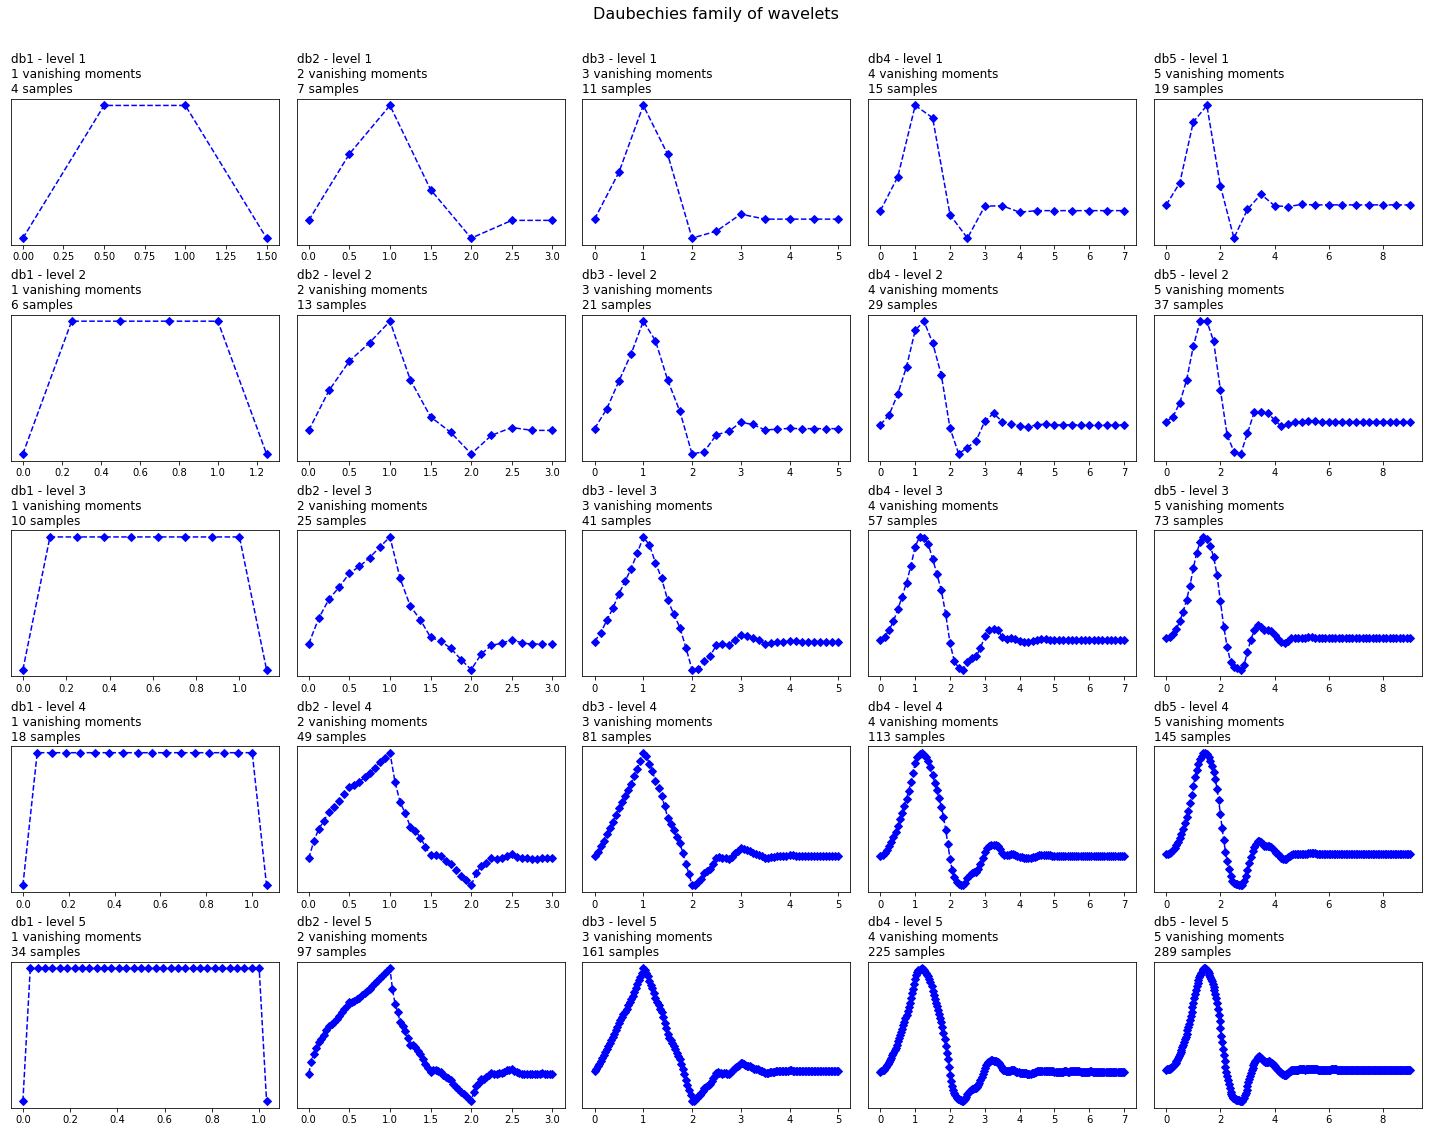

In [0]:
db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

PyWavelets contains Daubechies wavelets up to order 20 (db20).

## Wavelet Application

**Human Activity Recognition Using Smartphones Data Set**


Data Set Information:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

[Source link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict, Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Class creation and initialization 

In [0]:
FeatureTraining = np.load('/content/drive/My Drive/data/FeatureExtractionMethod/UciHar/DataWalking.npy',allow_pickle=True)
LabelTraining = np.load('/content/drive/My Drive/data/FeatureExtractionMethod/UciHar/LabelsWalking.npy',allow_pickle=True)

The measurements are done at a constant rate of 50 Hz. After filtering out the noise, the signals are cut in fixed-width windows of 2.56 sec with an overlap of 1.28 sec. Each signal will therefore have `50 x 2.56 = 128` samples in total.

In [0]:
train_signals=FeatureTraining[0]
train_labels=LabelTraining[0]

In [0]:
signal_no = 15
signals = train_signals[signal_no, :, :] ## Take signal no 15 out of the 7352
# signals.shape
signal_Acc = signals[:, 0]   ## body_acc_x


Visualize Wavelet

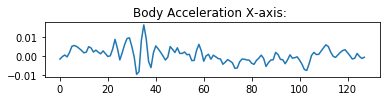

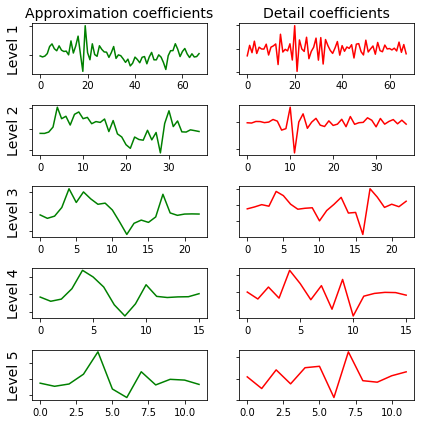

In [0]:
import pywt
 
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Body Acceleration X-axis: ")
ax.plot(signal_Acc)
plt.show()
    
data = signal_Acc
waveletname = 'sym5'  ## Haar
x = np.linspace(0, 1, num=len(signal_Acc))
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname) ## The return data is the approximation coeff
    axarr[ii, 0].plot(data, 'g')
    axarr[ii, 1].plot(coeff_d, 'r')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

Schematic representation of the high pass and low pass filters applied on the signal at each level.


* The pywt.dwt return two sets of coefficients; the approximation coefficients and detail coefficients.
* The approximation coefficients represent the output of the low pass filter (averaging filter) of the DWT.
* The detail coefficients represent the output of the high pass filter (difference filter) of the DWT.
* By applying the DWT again on the approximation coefficients of the previous DWT, we get the wavelet transform of the next level.
* At each next level, the original signal is also sampled down by a factor of 2.


## Generating features using the wavelet coefficients as the inputs

In [0]:
import scipy.stats

def calculate_crossings(list_values):
    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_mean_crossings]

def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    return entropy
    
def get_features(list_values):
    entropy = calculate_entropy(list_values)
    crossings = calculate_crossings(list_values)
    # return [entropy] + crossings
    return [entropy]

In [0]:
dataset=train_signals[:2]  ## For simplicity, only used the first two signals
# dataset=train_signals[15]  ## For simplicity, only used the first two signals
print("shape",dataset.shape)

shape (2, 128, 9)


The pywt.wavedec() function can immediately calculate the coefficients of a higher level. This functions takes as input the original signal and the level n and returns `[cA_n, cD_n, cD_n-1, …, cD2, cD1]`



The first element (cA_n) of the result is ***A***pproximation coefficients array and the following elements (cD_n - cD1) are ***D***etails coefficients arrays.

In other word, the function returns one set of approximation coefficients (of the n-th level) and n sets of detail coefficients (1 to n-th level).




<img src="https://drive.google.com/uc?id=1F3y7qWsqqU25ydngicF6JRlGP_XE7m1r" alt="x"  width=500/>



<!-- ![alt text](https://drive.google.com/uc?id=1F3y7qWsqqU25ydngicF6JRlGP_XE7m1r) -->

In [0]:
waveletname = 'sym5'  ## 'Haar' 

import pywt
uci_har_features = []
uci_har_featuresx=[]
for signal_no in range(0, len(dataset)):
  features = []
  # for signal_comp in range(0,dataset.shape[2]):## From 1,2,...,9
  NoComp=1
  for signal_comp in range(0,NoComp):## To digest how the code work: 
    signal = dataset[signal_no, :, signal_comp]  
    list_coeff = pywt.wavedec(signal, waveletname,level=5)  
    for coeff in list_coeff:
      features += get_features(coeff)  ## Return the entropy and mean crossing using the coeff as an input
  uci_har_features.append(features)  ## return a nested array (e.g. # signal_no && 54+108+486 features col)
X = np.array(uci_har_features)  ## Append all from 0 to len(dataset)

/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [0]:
#list_coeff

<!-- ![alt text](https://drive.google.com/uc?id=1xEHm7G2K7QbVcWp0ZBruKL8xLne8zpE7) -->



<img src="https://drive.google.com/uc?id=1O5gyTeLNdsI4INwF11Nm3LLUMymz13ta" alt="x"  width=400/>

Schematic representation for entropy and mean crossing



In [0]:
print("1) Total signals: {}; {} entries for {} components".format(len(X),len(X[0]),NoComp))
print("2) The {} entries for the {} components are {}".format(len(X[0]),NoComp,X[0]))

1) Total signals: 2; 6 entries for 1 components
2) The 6 entries for the 1 components are [2.48490665 2.48490665 2.77258872 3.13549422 3.63758616 4.21950771]


**Notes**

The rational for the choice of levels is the maximum level where at least one coefficient in the output is uncorrupted by edge effects caused by signal extension. Put another way, decomposition stops when the signal becomes shorter than the FIR filter length for a given wavelet. This corresponds to:

$\mathtt{max\_level} = \left\lfloor\log_2\left(\mathtt{
    \frac{data\_len}{filter\_len - 1}}\right)\right\rfloor$

In [0]:
w = pywt.Wavelet('sym5')
pywt.dwt_max_level(data_len=len(dataset[1, :, 1]  ), filter_len=w.dec_len)

3

# Classification

## Preamble

In [0]:
# import os
# import time
# import numpy as np
# import pandas as pd
# import scipy.io as sio
# from IPython.display import display

# import matplotlib.pyplot as plt
import pywt
import scipy.stats

# import datetime as dt
# from collections import defaultdict, Counter


In [0]:
def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    return entropy

def calculate_statistics(list_values):
    n5 = np.nanpercentile(list_values, 5)
    n25 = np.nanpercentile(list_values, 25)
    n75 = np.nanpercentile(list_values, 75)
    n95 = np.nanpercentile(list_values, 95)
    median = np.nanpercentile(list_values, 50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

def calculate_crossings(list_values):
    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_zero_crossings, no_mean_crossings]

def get_features(list_values):
    entropy = calculate_entropy(list_values)
    crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return [entropy] + crossings + statistics

def GetAllFeature(dataset, labels, waveletname):
    uci_har_features = []
    for signal_no in range(0, len(dataset)):
        features = []
        for signal_comp in range(0,dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]
            list_coeff = pywt.wavedec(signal, waveletname)
            for coeff in list_coeff:
                features += get_features(coeff)
        uci_har_features.append(features)
    X = np.array(uci_har_features)
    Y = np.array(labels)
    return X, Y

## Extract Features

In [0]:
SignalsTrain=FeatureTraining[0]
LabelsTrain=LabelTraining[0]
SignalsTest=FeatureTraining[1]
LabelsTest=LabelTraining[1]

waveletname = 'rbio3.1'
Signal_train, Label_train = GetAllFeature(SignalsTrain, LabelsTrain, waveletname)
Signal_test, Label_test = GetAllFeature(SignalsTest, LabelsTest, waveletname)

## DataWalking_Features = np.array([Signal_train, Signal_test])
## LabelsWalking_F = np.array([Label_train,Label_test])
## np.save('/content/drive/My Drive/Wavelet/DataWalking_Features.npy', DataWalking_Features) 
## np.save('/content/drive/My Drive/Wavelet/LabelsWalking_F.npy', LabelsWalking_F) 

## Extract Files: Speed things up

In [0]:
FeatureTrainingS = np.load('/content/drive/My Drive/data/FeatureExtractionMethod/UciHar/DataWalking_Features.npy',allow_pickle=True)
LabelTrainingS = np.load('/content/drive/My Drive/data/FeatureExtractionMethod/UciHar/LabelsWalking_F.npy',allow_pickle=True)

List of features extracted

1.   Statistic

*   n5, n25, n75, n95, median, mean, std, var, rms

2.   Crossings
* no_zero_crossings, no_mean_crossings

3. Entropy

##Call the classifier

In [0]:
!pip install import-ipynb # 

import os


os.chdir('/content/drive/My Drive/Colab Notebooks/FeatureExtractionMethod')



import import_ipynb
import HelperClassification   ## make sure this file in the same dir
                            ## print("current directory is : " + os.getcwd())
                            ## !ls
Label_train=LabelTrainingS[0]
Label_test=LabelTrainingS[1]

###Normailize Data

In [0]:
Features_train,Features_test=HelperClassification.Normalize(FeatureTrainingS[0],FeatureTrainingS[1]) #Adviseable

### Using Gaussian Naive Bayes To Train The Model

In [0]:
HelperClassification.ClassifyGNB(Features_train, Label_train,Features_test,Label_test)

### Using Random Forest To Train The Model

In [0]:
HelperClassification.ClassifyRandomForest(Features_train, Label_train,Features_test,Label_test)

### Using Logistic Regresion To Train The Model

In [0]:
HelperClassification.ClassifyLogisticRegression(Features_train, Label_train,Features_test,Label_test)

### Using KNearest Neighbors To Train The Model

In [0]:
HelperClassification.ClassifykNN(Features_train, Label_train,Features_test,Label_test)

### Using SVM To Train The Model

In [0]:
HelperClassification.ClassifySvm(Features_train, Label_train,Features_test,Label_test)

### Using Decision Tree To Train The Model

In [0]:
HelperClassification.ClassifyDecisionTree(Features_train, Label_train,Features_test,Label_test)